In [1]:
import pandas as pd
import numpy as np

from os.path import exists
from os import mkdir

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import open3d as o3d
from utils import *

#%env OPEN3D_CPU_RENDERING true

mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["legend.fontsize"] = 12
mpl.rcParams["font.size"] = 12

PLOTDIR = "plots"
DATADIR = "data"

DIRS = [PLOTDIR, DATADIR]

def plot_savepath(filename):
    return PLOTDIR + f"/{filename}"

def data_path(filename):
    return DATADIR + f"/{filename}"

for d in DIRS:
    if not exists(d):
        mkdir(d)
              
output_dir = f"figures/experiments/"

In [2]:
Organoid_Names = ['LAX7_1_MAP2.xls',
                  'LAX7_2_MAP2.xls', 
                  'LAX7_3_MAP2.xls',
                  'LAX7R_1_MAP2.xls',
                  'LAX7R_2_MAP2.xls',
                  'LAX7R_3_MAP2.xls',
                  'KCL_1_MAP2.xls',
                  'KCL_2_MAP2.xls',
                  'KCL_3_MAP2.xls',
                  'K562_1_MAP2.xls', 
                  'K562_2_MAP2.xls',
                  'K562_3_MAP2.xls',
                  'BCRABL_PDX_1_MAP2.xls',
                  'BCRABL_PDX_2_MAP2.xls', 
                  'BCRABL_PDX_3_MAP2.xls',
                  'HW8D60SUPB15_VOL_1.xls',
                  'HW8D60SUPB15_VOL_2.xls',
                  'HW8D60SUPB15_VOL_3.xls', 
                  'HW8D60KASUMI2_VOL_1.xls',
                  'HW8D60KASUMI2_VOL_2.xls', 
                  'HW8D60KASUMI2_VOL_3.xls',
                  '697_1_MAP2.xls',
                  '697_2_MAP2.xls', 
                  '697_3_MAP2.xls',
                  'VOL_1857_1.xls',
                  'VOL_1857_2.xls', 
                  'VOL_1857_3.xls',
                  'AICS-31_CD34+_Vol_(2).xls',
                  'Day10CD34V.xls',
                  'VOL_CD34_other.xls',
                  'BCELL_1_MAP2.xls',
                  'BCELL_2_MAP2.xls', 
                  'BCELL_3_MAP2.xls']

organoid_pts = []

for name in Organoid_Names:
    df = pd.read_excel(data_path(name), header = None, skiprows =1)
    df = df.rename(columns = df.iloc[0]).drop(df.index[0])
    df_drop = df.drop(columns=['Unit', 'Category', 'Collection', 'Time', 'ID'])
    pts = df_drop.to_numpy()
    organoid_pts.append(pts)

In [3]:
Entity_Names = ['LAX7_1_CFSE.xls',
                'LAX7_2_CFSE.xls', 
                'LAX7_3_CFSE.xls',
                'LAX7R_1_CFSE.xls',
                'LAX7R_2_CFSE.xls',
                'LAX7R_3_CFSE.xls',
                'KCL_1_CFSE.xls',
                'KCL_2_CFSE.xls',
                'KCL_3_CFSE.xls',
                'K562_1_CFSE.xls', 
                'K562_2_CFSE.xls',
                'K562_3_CFSE.xls',
                'BCRABL_PDX_1_CFSE.xls',
                'BCRABL_PDX_2_CFSE.xls', 
                'BCRABL_PDX_3_CFSE.xls',
                'HW8D60SUPB15_DOTS_1.xls',
                'HW8D60SUPB15_DOTS_2.xls',
                'HW8D60SUPB15_DOTS_3.xls', 
                'HW8D60KASUMI2_DOTS_1.xls',
                'HW8D60KASUMI2_DOTS_2.xls', 
                'HW8D60KASUMI2_DOTS_3.xls',
                '697_1_CFSE.xls',
                '697_2_CFSE.xls', 
                '697_3_CFSE.xls',
                'DOTS_1857_1.xls',
                'DOTS_1857_2.xls', 
                'DOTS_1857_3.xls',
                'AICS-31_CD34+_Dots_(2).xls',
                'Day10CD34D.xls',
                'DOTS_CD34_other.xls',
                'BCELL_1_CFSE.xls',
                'BCELL_2_CFSE.xls', 
                'BCELL_3_CFSE.xls']

entity_pts = []

for name in Entity_Names:
    df = pd.read_excel(data_path(name), header = None, skiprows =1)
    df = df.rename(columns = df.iloc[0]).drop(df.index[0])
    df_drop = df.drop(columns=['Unit', 'Category', 'Collection', 'Time', 'ID'])
    pts = df_drop.to_numpy()
    entity_pts.append(pts)

In [4]:
assert len(organoid_pts)==len(entity_pts)

distances = []

for index in range(len(organoid_pts)):
    # Organoids
    pcd_org = o3d.geometry.PointCloud()
    pcd_org.points = o3d.utility.Vector3dVector(organoid_pts[index])
    pcd_org.compute_convex_hull()
    pcd_org.estimate_normals()
    pcd_org.orient_normals_consistent_tangent_plane(10)
    
    with o3d.utility.VerbosityContextManager(
            o3d.utility.VerbosityLevel.Debug) as cm:
        mesh_org, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(
            pcd_org, depth=10, scale=10, linear_fit=True)
    # print(mesh)
    mesh_org.paint_uniform_color([0.8, 0.2, 0])
    mesh_org.compute_vertex_normals()
    mesh_org.filter_smooth_simple(number_of_iterations=5)
    
    mesh_to_fill_org = o3d.t.geometry.TriangleMesh.from_legacy(mesh_org)
    mesh_to_fill_org.fill_holes(hole_size=10)
    final_mesh_org = mesh_to_fill_org.to_legacy()
    
    # Entities
    pcd_ent = o3d.geometry.PointCloud()
    pcd_ent.points = o3d.utility.Vector3dVector(entity_pts[index])
    pcd_ent.compute_convex_hull()
    pcd_ent.estimate_normals()
    pcd_ent.orient_normals_consistent_tangent_plane(10)
    
    with o3d.utility.VerbosityContextManager(
            o3d.utility.VerbosityLevel.Debug) as cm:
        mesh_ent, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(
            pcd_ent, depth=10, scale=10, linear_fit=True)
    # print(mesh)
    mesh_ent.paint_uniform_color([0.8, 0.2, 0])
    mesh_ent.compute_vertex_normals()
    mesh_ent.filter_smooth_simple(number_of_iterations=5)
    
    mesh_to_fill_ent = o3d.t.geometry.TriangleMesh.from_legacy(mesh_ent)
    mesh_to_fill_ent.fill_holes(hole_size=10)
    final_mesh_ent = mesh_to_fill_ent.to_legacy()
    
    # Calculation of distances
    mesh_org_toleg = o3d.t.geometry.TriangleMesh.from_legacy(final_mesh_org)
    mesh_ent_toleg = o3d.t.geometry.TriangleMesh.from_legacy(final_mesh_ent)
    
    scene = o3d.t.geometry.RaycastingScene()
    mesh_ids = {}
    mesh_ids[scene.add_triangles(mesh_org_toleg)] = 'surface'
    mesh_ids[scene.add_triangles(mesh_ent_toleg)] = 'cells'

    query_point = np.asarray(entity_pts[index]).astype('float32')

    unsigned_distance = scene.compute_distance(query_point)
    distances.append(unsigned_distance.numpy())

[Open3D DEBUG] Input Points / Samples: 14080 / 12544
[Open3D DEBUG] #   Got kernel density: 0.00314498 (s), 413.801 (MB) / 413.801 (MB) / 413 (MB)
[Open3D DEBUG] #     Got normal field: 0.0366931 (s), 417.027 (MB) / 417.027 (MB) / 417 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 1.953769e-06 / 2.750907e-02
[Open3D DEBUG] #       Finalized tree: 0.0305300 (s), 423.273 (MB) / 423.273 (MB) / 423 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.0443599 (s), 423.473 (MB) / 423.473 (MB) / 423 (MB)
[Open3D DEBUG] #Set point constraints: 0.00423312 (s), 424.25 (MB) / 424.25 (MB) / 424 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 192291 / 214152 / 5609
[Open3D DEBUG] Memory Usage: 424.250 MB
[Open3D DEBUG] # Linear system solved: 0.144119 (s), 430.285 (MB) / 430.285 (MB) / 430 (MB)
[Open3D DEBUG] Got average: 0.00295782 (s), 430.734 (MB) / 430.734 (MB) / 430 (MB)
[Open3D DEBUG] Iso-Value: 5.065401e-01 = 7.132084e+03 / 1.408000e+04
[Open3D DEBUG] #          Total Solve:       


setting thread affinity failed


[Open3D DEBUG] Input Points / Samples: 20259 / 17374
[Open3D DEBUG] #   Got kernel density: 0.00385189 (s), 493.016 (MB) / 493.016 (MB) / 493 (MB)
[Open3D DEBUG] #     Got normal field: 0.0473769 (s), 493.215 (MB) / 493.215 (MB) / 493 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 1.811934e-06 / 3.670797e-02
[Open3D DEBUG] #       Finalized tree: 0.0365651 (s), 493.93 (MB) / 493.93 (MB) / 493 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.051461 (s), 493.93 (MB) / 493.93 (MB) / 493 (MB)
[Open3D DEBUG] #Set point constraints: 0.00528789 (s), 493.93 (MB) / 493.93 (MB) / 493 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 235971 / 264360 / 5321
[Open3D DEBUG] Memory Usage: 493.930 MB
[Open3D DEBUG] # Linear system solved: 0.153076 (s), 498.855 (MB) / 498.855 (MB) / 498 (MB)
[Open3D DEBUG] Got average: 0.00324798 (s), 499.215 (MB) / 499.215 (MB) / 499 (MB)
[Open3D DEBUG] Iso-Value: 5.115001e-01 = 1.036248e+04 / 2.025900e+04
[Open3D DEBUG] #          Total Solve:       1.3 (

[Open3D DEBUG] # Linear system solved: 0.0808530 (s), 601.395 (MB) / 601.395 (MB) / 601 (MB)
[Open3D DEBUG] Got average: 0.00164700 (s), 601.395 (MB) / 601.395 (MB) / 601 (MB)
[Open3D DEBUG] Iso-Value: 5.243064e-01 = 3.407992e+02 / 6.500000e+02
[Open3D DEBUG] #          Total Solve:       1.0 (s),     601.4 (MB)
[Open3D WARNING] Ignoring attribute 'normals' for TensorMap with primary key 'indices'
[Open3D DEBUG] Input Points / Samples: 7801 / 7078
[Open3D DEBUG] #   Got kernel density: 0.00227714 (s), 607.836 (MB) / 607.836 (MB) / 607 (MB)
[Open3D DEBUG] #     Got normal field: 0.028194 (s), 607.836 (MB) / 607.836 (MB) / 607 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 3.028070e-06 / 2.362197e-02
[Open3D DEBUG] #       Finalized tree: 0.0301151 (s), 607.836 (MB) / 607.836 (MB) / 607 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.043292 (s), 608.293 (MB) / 608.293 (MB) / 608 (MB)
[Open3D DEBUG] #Set point constraints: 0.00426388 (s), 608.293 (MB) / 608.293 (MB) / 608 (MB)
[Open3D D

        GS: 1.3933e-01 -> 1.3933e-01 -> 1.9927e-03 (1.4e-02) [8]
Cycle[0] Depth[ 5/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.012 /  0.010	(537.652 MB)	Nodes: 35937
          GS: 1.2636e-01 -> 1.2636e-01 -> 1.4081e-03 (1.1e-02) [8]
Cycle[0] Depth[ 6/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.001 /  0.001	(537.652 MB)	Nodes: 2448
            GS: 1.2770e-01 -> 1.2770e-01 -> 6.0815e-04 (4.8e-03) [8]
Cycle[0] Depth[ 7/10]:	Updated constraints / Got system / Solved in:  0.002 /  0.001 /  0.001	(537.652 MB)	Nodes: 3784
              GS: 9.4660e-02 -> 9.4660e-02 -> 6.2680e-04 (6.6e-03) [8]
Cycle[0] Depth[ 8/10]:	Updated constraints / Got system / Solved in:  0.002 /  0.002 /  0.004	(537.652 MB)	Nodes: 7360
                GS: 6.3856e-02 -> 6.3856e-02 -> 3.6969e-04 (5.8e-03) [8]
Cycle[0] Depth[ 9/10]:	Updated constraints / Got system / Solved in:  0.003 /  0.003 /  0.006	(537.652 MB)	Nodes: 7832
                  GS: 3.1435e-02 -> 3.1435e-02 -> 4.8571e-0

[Open3D DEBUG] #       Finalized tree: 0.0258231 (s), 617.23 (MB) / 624.621 (MB) / 624 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.0404069 (s), 617.23 (MB) / 624.621 (MB) / 624 (MB)
[Open3D DEBUG] #Set point constraints: 0.00454283 (s), 617.23 (MB) / 624.621 (MB) / 624 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 149213 / 167408 / 3121
[Open3D DEBUG] Memory Usage: 617.230 MB
[Open3D DEBUG] # Linear system solved: 0.114649 (s), 617.23 (MB) / 624.621 (MB) / 624 (MB)
[Open3D DEBUG] Got average: 0.00214291 (s), 617.23 (MB) / 624.621 (MB) / 624 (MB)
[Open3D DEBUG] Iso-Value: 5.153476e-01 = 3.196186e+03 / 6.202000e+03
[Open3D DEBUG] #          Total Solve:       1.1 (s),     624.6 (MB)
[Open3D WARNING] Ignoring attribute 'normals' for TensorMap with primary key 'indices'
[Open3D DEBUG] Input Points / Samples: 162 / 143
[Open3D DEBUG] #   Got kernel density: 0.000306845 (s), 618.289 (MB) / 624.621 (MB) / 624 (MB)
[Open3D DEBUG] #     Got normal field: 0.000373840 (s), 618.28

724e-01 -> 2.8093e-03 (1.7e-02) [8]
Cycle[0] Depth[ 5/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.011 /  0.009	(617.230 MB)	Nodes: 35937
          GS: 1.8062e-01 -> 1.8062e-01 -> 2.3162e-03 (1.3e-02) [8]
Cycle[0] Depth[ 6/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.001 /  0.001	(617.230 MB)	Nodes: 2872
            GS: 2.0371e-01 -> 2.0371e-01 -> 1.1307e-03 (5.6e-03) [8]
Cycle[0] Depth[ 7/10]:	Updated constraints / Got system / Solved in:  0.002 /  0.001 /  0.002	(617.230 MB)	Nodes: 4752
              GS: 1.6426e-01 -> 1.6426e-01 -> 1.0944e-03 (6.7e-03) [8]
Cycle[0] Depth[ 8/10]:	Updated constraints / Got system / Solved in:  0.002 /  0.002 /  0.006	(617.230 MB)	Nodes: 10856
                GS: 1.3415e-01 -> 1.3415e-01 -> 6.5685e-04 (4.9e-03) [8]
Cycle[0] Depth[ 9/10]:	Updated constraints / Got system / Solved in:  0.003 /  0.005 /  0.008	(617.230 MB)	Nodes: 28864
                  GS: 7.8438e-02 -> 7.8438e-02 -> 5.2750e-04 (6.7e-03) [8]
Cycle[0] De

[Open3D DEBUG] #  Set FEM constraints: 0.0310640 (s), 613.871 (MB) / 624.621 (MB) / 624 (MB)
[Open3D DEBUG] #Set point constraints: 0.00108600 (s), 613.871 (MB) / 624.621 (MB) / 624 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 76532 / 84056 / 3409
[Open3D DEBUG] Memory Usage: 613.871 MB
[Open3D DEBUG] # Linear system solved: 0.0779691 (s), 613.875 (MB) / 624.621 (MB) / 624 (MB)
[Open3D DEBUG] Got average: 0.00192881 (s), 613.875 (MB) / 624.621 (MB) / 624 (MB)
[Open3D DEBUG] Iso-Value: 5.116671e-01 = 2.757886e+02 / 5.390000e+02
[Open3D DEBUG] #          Total Solve:       1.0 (s),     624.6 (MB)
[Open3D WARNING] Ignoring attribute 'normals' for TensorMap with primary key 'indices'
[Open3D DEBUG] Input Points / Samples: 5425 / 4994
[Open3D DEBUG] #   Got kernel density: 0.00176883 (s), 621.785 (MB) / 624.621 (MB) / 624 (MB)
[Open3D DEBUG] #     Got normal field: 0.015866 (s), 621.785 (MB) / 624.621 (MB) / 624 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 4.145141e-06

d constraints / Got system / Solved in:  0.001 /  0.013 /  0.010	(613.871 MB)	Nodes: 35937
          GS: 9.1469e-02 -> 9.1469e-02 -> 8.4092e-04 (9.2e-03) [8]
Cycle[0] Depth[ 6/10]:	Updated constraints / Got system / Solved in:  0.002 /  0.001 /  0.001	(613.871 MB)	Nodes: 2568
            GS: 8.0093e-02 -> 8.0093e-02 -> 1.4480e-04 (1.8e-03) [8]
Cycle[0] Depth[ 7/10]:	Updated constraints / Got system / Solved in:  0.002 /  0.001 /  0.002	(613.871 MB)	Nodes: 3696
              GS: 5.5264e-02 -> 5.5264e-02 -> 3.2073e-04 (5.8e-03) [8]
Cycle[0] Depth[ 8/10]:	Updated constraints / Got system / Solved in:  0.002 /  0.002 /  0.003	(613.871 MB)	Nodes: 6232
                GS: 4.0097e-02 -> 4.0097e-02 -> 1.2602e-04 (3.1e-03) [8]
Cycle[0] Depth[ 9/10]:	Updated constraints / Got system / Solved in:  0.003 /  0.002 /  0.004	(613.871 MB)	Nodes: 4368
                  GS: 2.4156e-02 -> 2.4156e-02 -> 7.9449e-05 (3.3e-03) [8]
Cycle[0] Depth[10/10]:	Updated constraints / Got system / Solved in:  0.002 / 

[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 218695 / 248328 / 1609
[Open3D DEBUG] Memory Usage: 677.285 MB
[Open3D DEBUG] # Linear system solved: 0.144015 (s), 677.742 (MB) / 677.742 (MB) / 678 (MB)
[Open3D DEBUG] Got average: 0.00322819 (s), 677.742 (MB) / 677.742 (MB) / 678 (MB)
[Open3D DEBUG] Iso-Value: 5.114434e-01 = 1.346426e+04 / 2.632600e+04
[Open3D DEBUG] #          Total Solve:       1.2 (s),     679.3 (MB)
[Open3D WARNING] Ignoring attribute 'normals' for TensorMap with primary key 'indices'
[Open3D DEBUG] Input Points / Samples: 953 / 869
[Open3D DEBUG] #   Got kernel density: 0.000952005 (s), 679.305 (MB) / 679.305 (MB) / 679 (MB)
[Open3D DEBUG] #     Got normal field: 0.00341511 (s), 679.305 (MB) / 679.305 (MB) / 679 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 1.858126e-05 / 1.770794e-02
[Open3D DEBUG] #       Finalized tree: 0.0130429 (s), 679.305 (MB) / 679.305 (MB) / 679 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.0285239 (s), 679.305 (MB) / 679.305

[Open3D DEBUG] #          Total Solve:       1.3 (s),     699.2 (MB)4e-01 -> 1.6894e-01 -> 6.8795e-04 (4.1e-03) [8]
Cycle[0] Depth[ 6/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.001 /  0.001	(675.387 MB)	Nodes: 2504
            GS: 1.2037e-01 -> 1.2037e-01 -> 1.0474e-03 (8.7e-03) [8]
Cycle[0] Depth[ 7/10]:	Updated constraints / Got system / Solved in:  0.002 /  0.001 /  0.002	(675.387 MB)	Nodes: 4176
              GS: 1.0979e-01 -> 1.0979e-01 -> 7.4723e-04 (6.8e-03) [8]
Cycle[0] Depth[ 8/10]:	Updated constraints / Got system / Solved in:  0.002 /  0.002 /  0.004	(675.387 MB)	Nodes: 7384
                GS: 6.9611e-02 -> 6.9611e-02 -> 3.6486e-04 (5.2e-03) [8]
Cycle[0] Depth[ 9/10]:	Updated constraints / Got system / Solved in:  0.003 /  0.003 /  0.005	(675.387 MB)	Nodes: 7864
                  GS: 3.6877e-02 -> 3.6877e-02 -> 3.8342e-04 (1.0e-02) [8]
Cycle[0] Depth[10/10]:	Updated constraints / Got system / Solved in:  0.003 /  0.004 /  0.009	(675.387 MB)	Nodes: 5608
 

e[0] Depth[10/10]:	Updated constraints / Got system / Solved in:  0.002 /  0.006 /  0.009	(680.445 MB)	Nodes: 16128
                    GS: 4.7836e-02 -> 4.7836e-02 -> 1.3392e-05 (2.8e-04) [8]
Cycle[0] Depth[ 0/10]:	Updated constraints / Got system / Solved in:  0.000 /  0.000 /  0.000	(672.500 MB)	Nodes: 8
CG: 7.3565e-03 -> 7.3565e-03 -> 1.6842e-06 (2.3e-04) [32652]
Cycle[0] Depth[ 1/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.000 /  0.000	(672.500 MB)	Nodes: 27
  GS: 3.9356e-02 -> 3.9356e-02 -> 4.3128e-04 (1.1e-02) [8]
Cycle[0] Depth[ 2/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.001 /  0.000	(672.500 MB)	Nodes: 125
    GS: 6.1322e-02 -> 6.1322e-02 -> 1.0941e-03 (1.8e-02) [8]
Cycle[0] Depth[ 3/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.002 /  0.001	(672.516 MB)	Nodes: 729
      GS: 1.0664e-01 -> 1.0664e-01 -> 1.9105e-03 (1.8e-02) [8]
Cycle[0] Depth[ 4/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.003 /  0.001	

[Open3D DEBUG] #          Total Solve:       1.0 (s),     720.5 (MB)
[Open3D WARNING] Ignoring attribute 'normals' for TensorMap with primary key 'indices'
[Open3D DEBUG] Input Points / Samples: 19928 / 12227
[Open3D DEBUG] #   Got kernel density: 0.00253797 (s), 720.559 (MB) / 720.559 (MB) / 720 (MB)
[Open3D DEBUG] #     Got normal field: 0.0290809 (s), 720.566 (MB) / 720.566 (MB) / 720 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 1.293769e-06 / 2.578223e-02
[Open3D DEBUG] #       Finalized tree: 0.0303869 (s), 720.566 (MB) / 720.566 (MB) / 720 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.0479829 (s), 720.566 (MB) / 720.566 (MB) / 720 (MB)
[Open3D DEBUG] #Set point constraints: 0.00380778 (s), 720.566 (MB) / 720.566 (MB) / 720 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 178214 / 198800 / 4873
[Open3D DEBUG] Memory Usage: 720.566 MB
[Open3D DEBUG] # Linear system solved: 0.173851 (s), 720.57 (MB) / 720.57 (MB) / 720 (MB)
[Open3D DEBUG] Got average: 0.00267196 (s

[WARNING] /Users/runner/work/Open3D/Open3D/build/poisson/src/ext_poisson/PoissonRecon/Src/FEMTree.IsoSurface.specialized.inl (Line 1858)
          Extract
          bad average roots: 2


	Nodes: 8112
                    GS: 5.1238e-02 -> 5.1238e-02 -> 1.6786e-04 (3.3e-03) [8]
Cycle[0] Depth[ 0/10]:	Updated constraints / Got system / Solved in:  0.000 /  0.000 /  0.000	(718.863 MB)	Nodes: 8
CG: 9.1131e-03 -> 9.1131e-03 -> 1.9871e-07 (2.2e-05) [32652]
Cycle[0] Depth[ 1/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.000 /  0.000	(718.863 MB)	Nodes: 27
  GS: 2.9913e-02 -> 2.9913e-02 -> 3.8143e-04 (1.3e-02) [8]
Cycle[0] Depth[ 2/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.000 /  0.000	(718.863 MB)	Nodes: 125
    GS: 4.7251e-02 -> 4.7251e-02 -> 9.6069e-04 (2.0e-02) [8]
Cycle[0] Depth[ 3/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.001 /  0.000	(718.863 MB)	Nodes: 729
      GS: 8.3565e-02 -> 8.3565e-02 -> 1.6335e-03 (2.0e-02) [8]
Cycle[0] Depth[ 4/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.003 /  0.002	(718.863 MB)	Nodes: 4913
        GS: 1.2149e-01 -> 1.2149e-01 -> 1.8208e-03 (1.5e-02) [8]
Cycle[0] Dept

[Open3D DEBUG] Input Points / Samples: 46549 / 39420
[Open3D DEBUG] #   Got kernel density: 0.00645304 (s), 785.34 (MB) / 785.34 (MB) / 785 (MB)
[Open3D DEBUG] #     Got normal field: 0.075115 (s), 785.34 (MB) / 785.34 (MB) / 785 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 9.131911e-07 / 4.250813e-02
[Open3D DEBUG] #       Finalized tree: 0.045845 (s), 785.34 (MB) / 785.34 (MB) / 785 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.0550039 (s), 785.34 (MB) / 785.34 (MB) / 785 (MB)
[Open3D DEBUG] #Set point constraints: 0.00866294 (s), 785.34 (MB) / 785.34 (MB) / 785 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 306237 / 348776 / 1209
[Open3D DEBUG] Memory Usage: 785.340 MB
[Open3D DEBUG] # Linear system solved: 0.187316 (s), 785.422 (MB) / 785.422 (MB) / 785 (MB)
[Open3D DEBUG] Got average: 0.00482106 (s), 785.422 (MB) / 785.422 (MB) / 785 (MB)
[Open3D DEBUG] Iso-Value: 5.043206e-01 = 2.347562e+04 / 4.654900e+04
[Open3D DEBUG] #          Total Solve:       1.5 (s),  

es: 4913
        GS: 2.1928e-01 -> 2.1928e-01 -> 4.2067e-03 (1.9e-02) [8]
Cycle[0] Depth[ 5/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.013 /  0.009	(796.402 MB)	Nodes: 35937
          GS: 2.2991e-01 -> 2.2991e-01 -> 1.5047e-03 (6.5e-03) [8]
Cycle[0] Depth[ 6/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.001 /  0.001	(796.402 MB)	Nodes: 2200
            GS: 1.2447e-01 -> 1.2447e-01 -> 1.0226e-03 (8.2e-03) [8]
Cycle[0] Depth[ 7/10]:	Updated constraints / Got system / Solved in:  0.002 /  0.001 /  0.002	(796.402 MB)	Nodes: 3920
              GS: 1.1337e-01 -> 1.1337e-01 -> 2.5202e-04 (2.2e-03) [8]
Cycle[0] Depth[ 8/10]:	Updated constraints / Got system / Solved in:  0.002 /  0.002 /  0.003	(796.402 MB)	Nodes: 7760
                GS: 7.6294e-02 -> 7.6294e-02 -> 3.4309e-04 (4.5e-03) [8]
Cycle[0] Depth[ 9/10]:	Updated constraints / Got system / Solved in:  0.003 /  0.003 /  0.004	(796.402 MB)	Nodes: 6408
                  GS: 4.2985e-02 -> 4.2985e-02 -> 

[Open3D DEBUG] # Linear system solved: 0.0785892 (s), 844.277 (MB) / 844.277 (MB) / 845 (MB)
[Open3D DEBUG] Got average: 0.00173998 (s), 844.277 (MB) / 844.277 (MB) / 845 (MB)
[Open3D DEBUG] Iso-Value: 5.199863e-01 = 5.080266e+02 / 9.770000e+02
[Open3D DEBUG] #          Total Solve:       1.0 (s),     845.2 (MB)
[Open3D WARNING] Ignoring attribute 'normals' for TensorMap with primary key 'indices'
[Open3D DEBUG] Input Points / Samples: 61113 / 22374
[Open3D DEBUG] #   Got kernel density: 0.00300002 (s), 876.816 (MB) / 876.816 (MB) / 885 (MB)
[Open3D DEBUG] #     Got normal field: 0.0339038 (s), 876.816 (MB) / 876.816 (MB) / 885 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 4.575904e-07 / 2.796472e-02
[Open3D DEBUG] #       Finalized tree: 0.035346 (s), 876.816 (MB) / 876.816 (MB) / 885 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.0432971 (s), 876.816 (MB) / 876.816 (MB) / 885 (MB)
[Open3D DEBUG] #Set point constraints: 0.00659299 (s), 876.816 (MB) / 876.816 (MB) / 885 (MB)
[Open3

       [Open3D DEBUG] Input Points / Samples: 12281 / 7767             GS: 8.0006e-02 -> 8.0006e-02 -> 6.6218e-05 (8.3e-04) [8]
Cycle[0] Depth[ 0/10]:	Updated constraints / Got system / Solved in:  0.000 /  0.000 /  0.000	(844.277 MB)	Nodes: 8
CG: 6.4572e-03 -> 6.4572e-03 -> 3.7846e-06 (5.9e-04) [32652]
Cycle[0] Depth[ 1/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.000 /  0.000	(844.277 MB)	Nodes: 27
  GS: 4.3525e-02 -> 4.3525e-02 -> 4.3082e-04 (9.9e-03) [8]
Cycle[0] Depth[ 2/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.000 /  0.000	(844.277 MB)	Nodes: 125
    GS: 6.7160e-02 -> 6.7160e-02 -> 1.0994e-03 (1.6e-02) [8]
Cycle[0] Depth[ 3/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.001 /  0.000	(844.277 MB)	Nodes: 729
      GS: 1.1425e-01 -> 1.1425e-01 -> 1.9265e-03 (1.7e-02) [8]
Cycle[0] Depth[ 4/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.004 /  0.001	(844.277 MB)	Nodes: 4913
        GS: 1.4537e-01 -> 1.4537e-01 -> 

Cycle[0] Depth[ 0/10]:	Updated constraints / Got sys[Open3D DEBUG] Input Points / Samples: 31909 / 28430
[Open3D DEBUG] #   Got kernel density: 0.00582981 (s), 881.379 (MB) / 881.379 (MB) / 885 (MB)
[Open3D DEBUG] #     Got normal field: 0.0695419 (s), 881.379 (MB) / 881.379 (MB) / 885 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 1.420198e-06 / 4.531708e-02
[Open3D DEBUG] #       Finalized tree: 0.0453269 (s), 881.379 (MB) / 881.379 (MB) / 885 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.0633059 (s), 881.379 (MB) / 881.379 (MB) / 885 (MB)
[Open3D DEBUG] #Set point constraints: 0.00768304 (s), 881.379 (MB) / 881.379 (MB) / 885 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 311214 / 353824 / 1849
[Open3D DEBUG] Memory Usage: 881.379 MB
[Open3D DEBUG] # Linear system solved: 0.203365 (s), 881.379 (MB) / 881.379 (MB) / 885 (MB)
[Open3D DEBUG] Got average: 0.00479388 (s), 881.379 (MB) / 881.379 (MB) / 885 (MB)
[Open3D DEBUG] Iso-Value: 5.058905e-01 = 1.614246e+04 / 3.19

                    GS: 4.4831e-02 -> 4.4831e-02 -> 2.0474e-04 (4.6e-03) [8]
Cycle[0] Depth[ 0/10]:	Updated constraints / Got system / Solved in:  0.000 /  0.000 /  0.000	(879.133 MB)	Nodes: 8
CG: 8.2498e-03 -> 8.2498e-03 -> 1.9672e-07 (2.4e-05) [32652]
Cycle[0] Depth[ 1/10]:	Updated constraints / Got system / Solved in:  0.003 /  0.000 /  0.000	(879.133 MB)	Nodes: 27
  GS: 1.0608e-02 -> 1.0608e-02 -> 7.8154e-06 (7.4e-04) [8]
Cycle[0] Depth[ 2/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.000 /  0.000	(879.133 MB)	Nodes: 125
    GS: 2.1965e-02 -> 2.1965e-02 -> 3.1107e-05 (1.4e-03) [8]
Cycle[0] Depth[ 3/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.001 /  0.000	(879.133 MB)	Nodes: 729
      GS: 4.0044e-02 -> 4.0044e-02 -> 7.5632e-05 (1.9e-03) [8]
Cycle[0] Depth[ 4/10]:	Updated constraints / Got system / Solved in:  0.001 /  0.003 /  0.002	(879.133 MB)	Nodes: 4913
        GS: 5.7559e-02 -> 5.7559e-02 -> 1.1574e-04 (2.0e-03) [8]
Cycle[0] Depth[ 5/10]:	Upd

In [5]:
dict_keys = ['A', 'B', 'C', 'D', 'E', 'F', 'G',
             'H', 'I', 'J', 'K', 'L', 'M', 'N',
             'O', 'P', 'Q', 'R', 'S', 'T', 'U',
             'V','W', 'X', 'Y', 'Z', 'AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG']

d = dict(zip(dict_keys, distances))

In [6]:
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
df = df.melt(var_name = "Entity", value_name = "Distance to Surface (\u03BCm)")
display(df)

Entity  Distance to Surface (μm)
0           A                 12.044937
1           A                  5.572272
2           A                  0.932012
3           A                  0.022607
4           A                  1.137290
...       ...                       ...
132952     GG                       NaN
132953     GG                       NaN
132954     GG                       NaN
132955     GG                       NaN
132956     GG                       NaN

[132957 rows x 2 columns]

In [7]:
df.loc[df['Entity'] == 'A', 'Types'] = 'Repeat 1'  
df.loc[df['Entity'] == 'B', 'Types'] = 'Repeat 2'  
df.loc[df['Entity'] == 'C', 'Types'] = 'Repeat 3'  
df.loc[df['Entity'] == 'D', 'Types'] = 'Repeat 1'  
df.loc[df['Entity'] == 'E', 'Types'] = 'Repeat 2'  
df.loc[df['Entity'] == 'F', 'Types'] = 'Repeat 3'
df.loc[df['Entity'] == 'G', 'Types'] = 'Repeat 1'  
df.loc[df['Entity'] == 'H', 'Types'] = 'Repeat 2'
df.loc[df['Entity'] == 'I', 'Types'] = 'Repeat 3'  
df.loc[df['Entity'] == 'J', 'Types'] = 'Repeat 1'  
df.loc[df['Entity'] == 'K', 'Types'] = 'Repeat 2'  
df.loc[df['Entity'] == 'L', 'Types'] = 'Repeat 3'  
df.loc[df['Entity'] == 'M', 'Types'] = 'Repeat 1'  
df.loc[df['Entity'] == 'N', 'Types'] = 'Repeat 2'
df.loc[df['Entity'] == 'O', 'Types'] = 'Repeat 3'  
df.loc[df['Entity'] == 'P', 'Types'] = 'Repeat 1'
df.loc[df['Entity'] == 'Q', 'Types'] = 'Repeat 2'  
df.loc[df['Entity'] == 'R', 'Types'] = 'Repeat 3'
df.loc[df['Entity'] == 'S', 'Types'] = 'Repeat 1'  
df.loc[df['Entity'] == 'T', 'Types'] = 'Repeat 2'  
df.loc[df['Entity'] == 'U', 'Types'] = 'Repeat 3'  
df.loc[df['Entity'] == 'V', 'Types'] = 'Repeat 1'  
df.loc[df['Entity'] == 'W', 'Types'] = 'Repeat 2'
df.loc[df['Entity'] == 'X', 'Types'] = 'Repeat 3'  
df.loc[df['Entity'] == 'Y', 'Types'] = 'Repeat 1'
df.loc[df['Entity'] == 'Z', 'Types'] = 'Repeat 2'  
df.loc[df['Entity'] == 'AA', 'Types'] = 'Repeat 3'
df.loc[df['Entity'] == 'BB', 'Types'] = 'Repeat 1'  
df.loc[df['Entity'] == 'CC', 'Types'] = 'Repeat 2'  
df.loc[df['Entity'] == 'DD', 'Types'] = 'Repeat 3'
df.loc[df['Entity'] == 'EE', 'Types'] = 'Repeat 1'  
df.loc[df['Entity'] == 'FF', 'Types'] = 'Repeat 2'
df.loc[df['Entity'] == 'GG', 'Types'] = 'Repeat 3'  

df['Entity'] = df['Entity'].replace({
              'A':'Initial',
              'B':'Initial',
              'C':'Initial',
              'D':'Relapse',
              'E':'Relapse',
              'F':'Relapse',
              'G':'KCL',
              'H':'KCL',
              'I':'KCL',
              'J':'K562',
              'K':'K562',
              'L':'K562',
              'M':'PDX2',
              'N':'PDX2',
              'O':'PDX2',
              'P':'SUPB15',
              'Q':'SUPB15',
              'R':'SUPB15',
              'S':'KASUMI',
              'T':'KASUMI',
              'U':'KASUMI',
              'V':'697',
              'W':'697',
              'X':'697',
              'Y':'PDX',
              'Z':'PDX',
              'AA':'PDX',
              'BB':'HPSC',
              'CC':'HPSC',
              'DD':'HPSC',
              'EE':'B-Lymphocyte',
              'FF':'B-Lymphocyte',
              'GG':'B-Lymphocyte'}) 

df[np.isfinite(df["Distance to Surface (\u03BCm)"])]
df_final = df[df["Distance to Surface (\u03BCm)"] > 0.0001]
display(df_final)

#df_filtered below filters for measurements above 10μm
df_filtered = df_final[df_final['Distance to Surface (μm)'] > 10]
df_filtered.to_excel("df_filtered.xlsx", sheet_name='filtered')
display(df_filtered)

#Below are lines of code to extract the number of values for each 'Entity' given as "count of values for each entity"
entity_counts = df_filtered['Entity'].value_counts()

# Print the results
print("Count of values for each entity:")
print(entity_counts)

# Group by 'Entity' and 'Types' and calculate the count for each group
entity_type_counts = df_filtered.groupby(['Entity', 'Types']).size().reset_index(name='Count')

# Print the results
print("Count of values for each entity and replicate:")
print(entity_type_counts)

Entity  Distance to Surface (μm)     Types
0            Initial                 12.044937  Repeat 1
1            Initial                  5.572272  Repeat 1
2            Initial                  0.932012  Repeat 1
3            Initial                  0.022607  Repeat 1
4            Initial                  1.137290  Repeat 1
...              ...                       ...       ...
129851  B-Lymphocyte                  4.822407  Repeat 3
129852  B-Lymphocyte                  7.199219  Repeat 3
129853  B-Lymphocyte                  3.627583  Repeat 3
129854  B-Lymphocyte                  0.760324  Repeat 3
129855  B-Lymphocyte                 23.748123  Repeat 3

[36777 rows x 3 columns]

Entity  Distance to Surface (μm)     Types
0            Initial                 12.044937  Repeat 1
14           Initial                 55.825127  Repeat 1
15           Initial                 11.459015  Repeat 1
16           Initial                 10.131447  Repeat 1
17           Initial                 10.819058  Repeat 1
...              ...                       ...       ...
129786  B-Lymphocyte                 19.889431  Repeat 3
129826  B-Lymphocyte                 12.534343  Repeat 3
129828  B-Lymphocyte                 38.622421  Repeat 3
129842  B-Lymphocyte                 98.213760  Repeat 3
129855  B-Lymphocyte                 23.748123  Repeat 3

[2397 rows x 3 columns]

Count of values for each entity:
PDX             709
697             328
SUPB15          272
HPSC            221
B-Lymphocyte    216
PDX2            163
KASUMI          140
Initial         124
K562            121
KCL              54
Relapse          49
Name: Entity, dtype: int64
Count of values for each entity and replicate:
          Entity     Types  Count
0            697  Repeat 1     76
1            697  Repeat 2    192
2            697  Repeat 3     60
3   B-Lymphocyte  Repeat 1     44
4   B-Lymphocyte  Repeat 2    102
5   B-Lymphocyte  Repeat 3     70
6           HPSC  Repeat 1     84
7           HPSC  Repeat 2     68
8           HPSC  Repeat 3     69
9        Initial  Repeat 1     26
10       Initial  Repeat 2     46
11       Initial  Repeat 3     52
12          K562  Repeat 1     76
13          K562  Repeat 2     23
14          K562  Repeat 3     22
15        KASUMI  Repeat 1     34
16        KASUMI  Repeat 2     28
17        KASUMI  Repeat 3     78
18           KCL  Repeat 1 

In [8]:
#The following code snipppet is optional for when you want to calculate the relative percentage
#of measurements above the 10micron boundary, againt the total count of measurements.

# Calculate the total count of values for each 'Entity' and 'Types' (replicate)
entity_type_total_counts = df_final.groupby(['Entity', 'Types']).size().reset_index(name='Total_Count')

# Calculate the count of values above 10μm for each 'Entity' and 'Types'
entity_type_above_limit_counts = df_final[df_final["Distance to Surface (\u03BCm)"] > 10].groupby(['Entity', 'Types']).size().reset_index(name='Above_Limit_Count')

# Merge the two DataFrames based on 'Entity' and 'Types'
relative_percentage = pd.merge(entity_type_total_counts, entity_type_above_limit_counts, on=['Entity', 'Types'], how='outer')

# Calculate the percentage for each group
relative_percentage['Percentage'] = (relative_percentage['Above_Limit_Count'] / relative_percentage['Total_Count']) * 100

# Print the resulting DataFrame
print("DataFrame 'relative_percentage':")
print(relative_percentage)
relative_percentage.to_excel("df_relperc_leukgroup.xlsx", sheet_name='percentage_filtered')

DataFrame 'relative_percentage':
          Entity     Types  Total_Count  Above_Limit_Count  Percentage
0            697  Repeat 1          806                 76    9.429280
1            697  Repeat 2         1218                192   15.763547
2            697  Repeat 3          850                 60    7.058824
3   B-Lymphocyte  Repeat 1         1595                 44    2.758621
4   B-Lymphocyte  Repeat 2         1281                102    7.962529
5   B-Lymphocyte  Repeat 3          928                 70    7.543103
6           HPSC  Repeat 1          151                 84   55.629139
7           HPSC  Repeat 2          641                 68   10.608424
8           HPSC  Repeat 3          127                 69   54.330709
9        Initial  Repeat 1          357                 26    7.282913
10       Initial  Repeat 2         1226                 46    3.752039
11       Initial  Repeat 3         1066                 52    4.878049
12          K562  Repeat 1          901     

In [9]:
#This is optional to change any names as above
df.rename(columns={'A': 'Leukemia Replicate 1',
                   'B': 'Leukemia Replicate 2',
                   'C': 'Leukemia Replicate 3',
                   'D': 'Leukemia Replicate 1',
                   'E': 'Leukemia Replicate 2',
                   'F': 'Leukemia Replicate 3',
                   'G': 'Leukemia Replicate 1',
                   'H': 'Leukemia Replicate 2',
                   'I': 'Leukemia Replicate 3',
                   'J': 'Leukemia Replicate 1',
                   'K': 'Leukemia Replicate 2',
                   'L': 'Leukemia Replicate 3',
                   'M': 'Leukemia Replicate 1',
                   'N': 'Leukemia Replicate 2',
                   'O': 'Leukemia Replicate 3',
                   'P': 'Leukemia Replicate 1',
                   'Q': 'Leukemia Replicate 2',
                   'R': 'Leukemia Replicate 3',
                   'S': 'Leukemia Replicate 1',
                   'T': 'Leukemia Replicate 2',
                   'U': 'Leukemia Replicate 3',
                   'V': 'Leukemia Replicate 1',
                   'W': 'Leukemia Replicate 2',
                   'X': 'Leukemia Replicate 3',
                   'Y': 'Leukemia Replicate 1',
                   'Z': 'Leukemia Replicate 2',
                   'AA': 'HPSC Replicate 1',
                   'BB': 'HPSC Replicate 2',
                   'CC': 'HPSC Replicate 3',
                   'DD': 'B Lymphocyte Replicate 1',
                   'EE': 'B Lymphocyte Replicate 2',
                   'FF': 'B Lymphocyte Replicate 3'}, inplace=True)

#df.to_excel("unmelted_leukemiabcell_data.xlsx", sheet_name='unmeltedLEUK') 
df_leukemia = df.melt(var_name = "Entity", value_name = "Distance to Surface (\u03BCm)")
#df_leukemia.to_excel("melted_leukemiabcell_data.xlsx", sheet_name='meltedLEUK') 

/var/folders/9w/4xkqf_xd0kg5ycr900ldx_9w0000gn/T/ipykernel_9208/1580272987.py:36: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_leukemia = df.melt(var_name = "Entity", value_name = "Distance to Surface (\u03BCm)")


In [10]:
#vis = o3d.visualization.Visualizer()
#vis.create_window(visible=False) #works for me with False, on some systems needs to be true
#vis.add_geometry(final_mesh_org)
#vis.update_geometry(final_mesh_org)
#vis.poll_events()
#vis.update_renderer()
#vis.capture_screen_image(plot_savepath('1857.png'), do_render=True)
#vis.destroy_window()

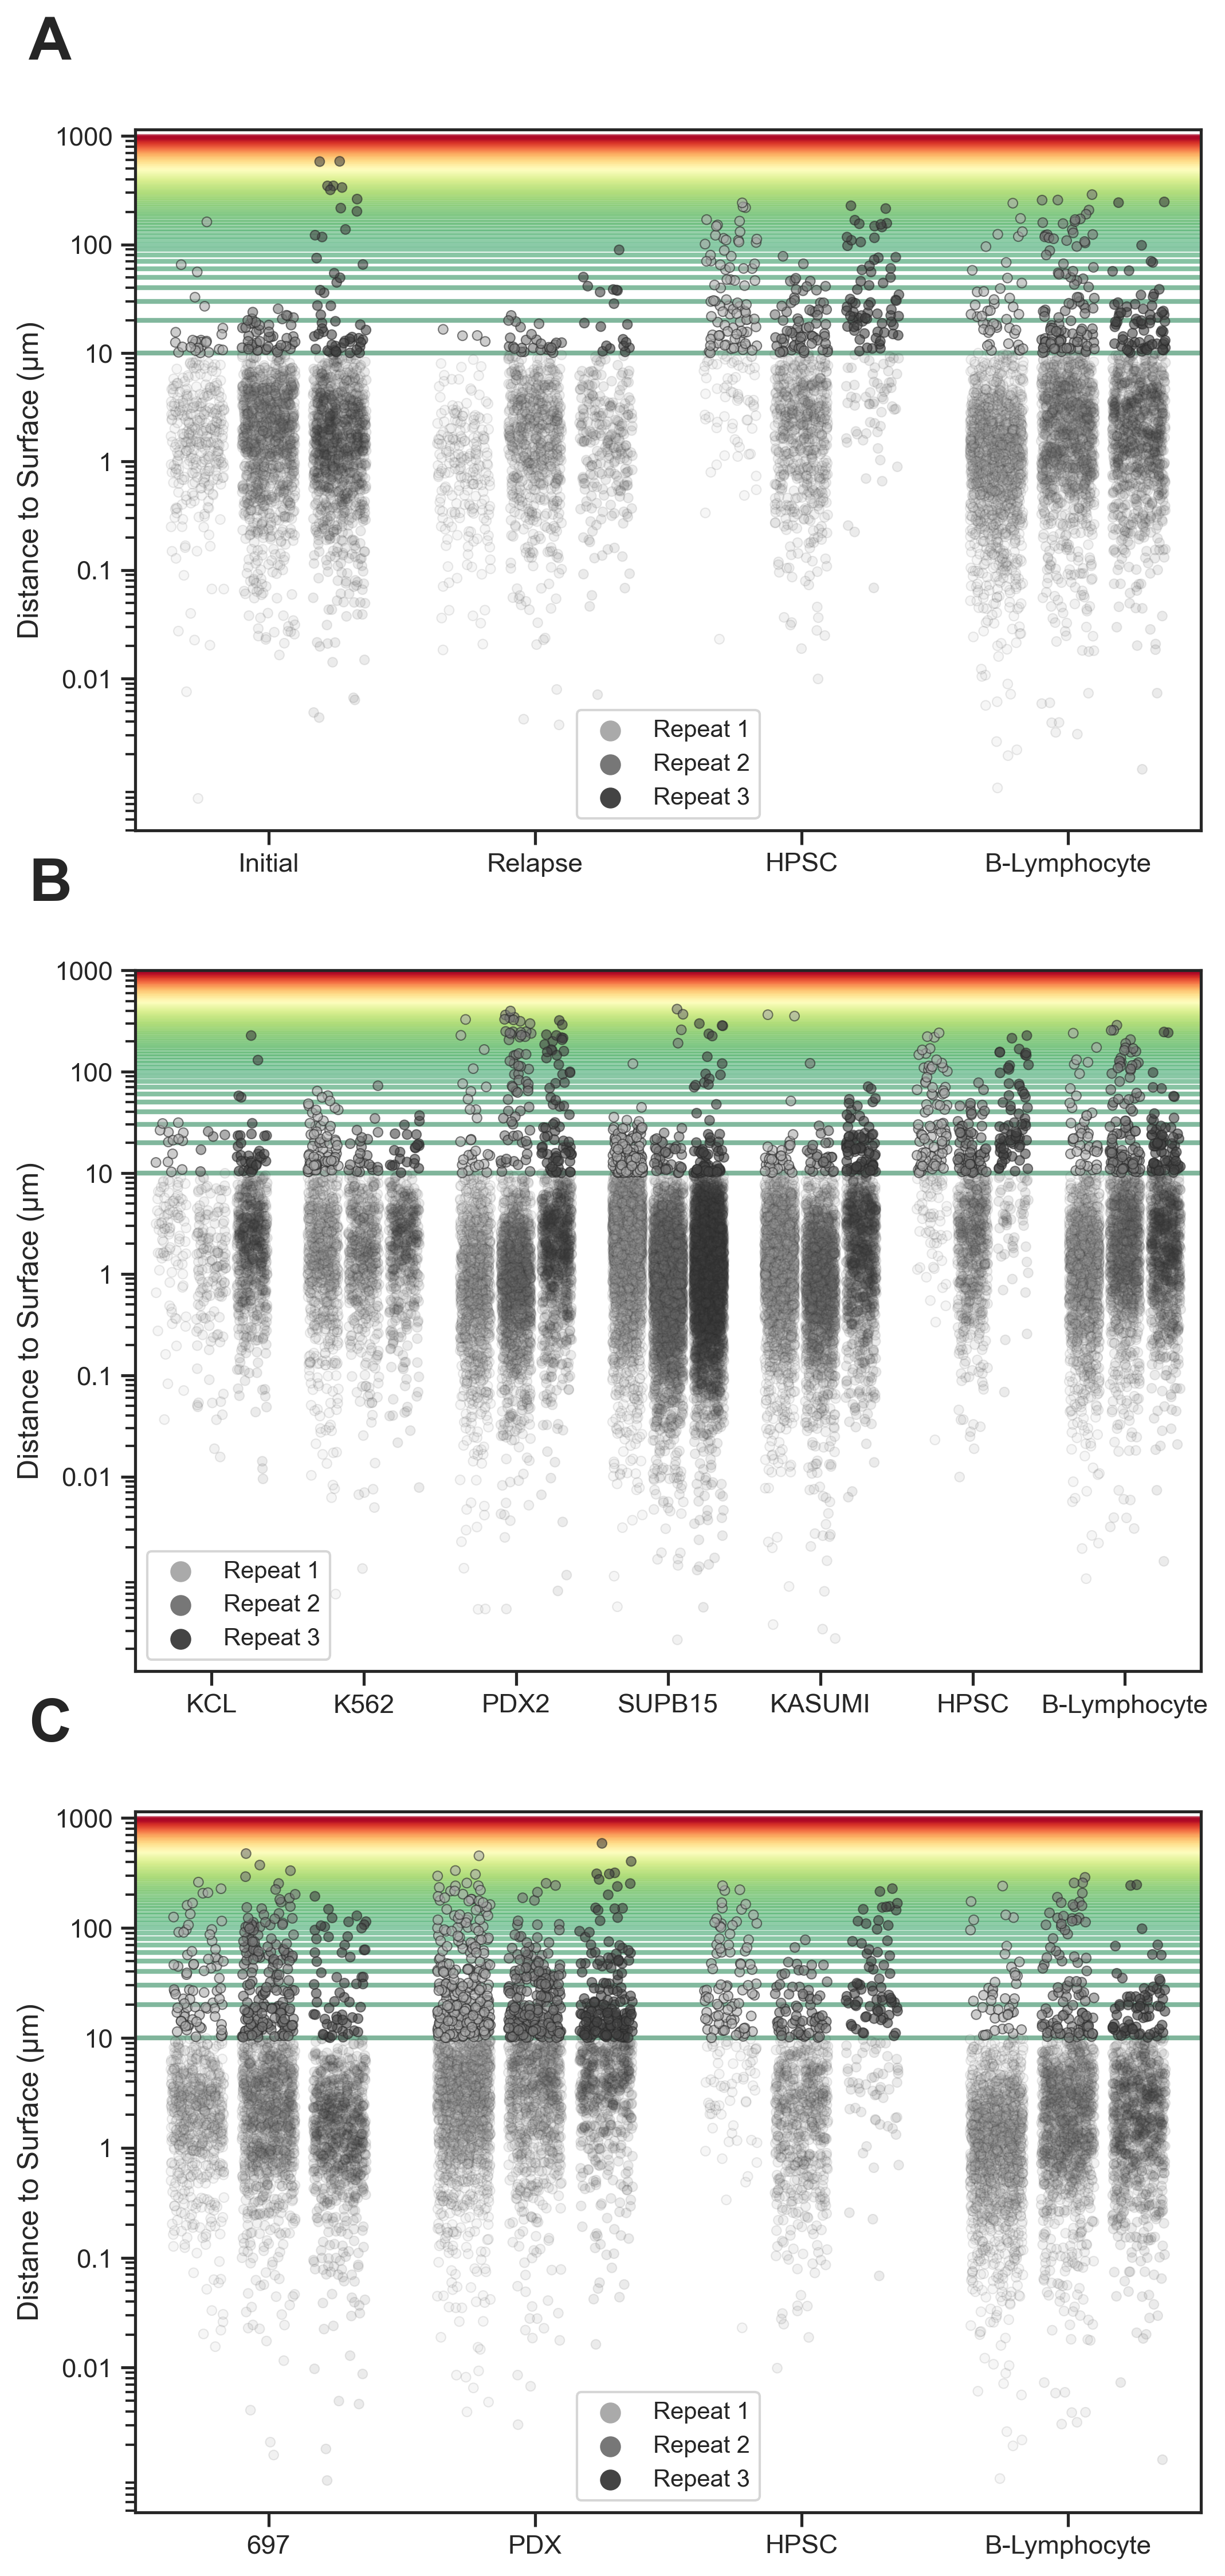

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_final is your DataFrame and it's already loaded

# Set the theme for the plots
sns.set_theme(style="ticks", palette="gray")

# Example unique entities and dynamic group creation for demonstration
# Replace this with your actual unique_entities extraction
unique_entities = df_final['Entity'].unique()

# Presuming 'unique_entities' are already defined

# Define your group structure with the specific indices for each group
# Each group will start with indices 10 to 11 from 'unique_entities', followed by the specific ranges
group_structure = [
    (0, 2),  # These are your original ranges; adjust as needed
    (2, 5),
    (7, 4)
]

# Adjusting the logic to prepend entities at indices 10 and 11 to each group
# We ensure the entities at indices 10 and 11 are added to the start of each dynamically created group
groups = [np.concatenate([unique_entities[9:12], unique_entities[start:start+length]]) for start, length in group_structure]


# Calculate number of subplot rows needed
num_rows = len(groups)
single_subplot_height = 6  # Height of each subplot
single_subplot_width = 8  # Width of each subplot
fig_height = num_rows * single_subplot_height
fig, axes = plt.subplots(num_rows, 1, figsize=(single_subplot_width, fig_height))


# Make sure axes is iterable when there's only one subplot
if num_rows == 1:
    axes = [axes]

# Define a grayscale palette
grayscale_palette = ["#AAAAAA", "#777777", "#444444"]

for i, group in enumerate(groups):
    filtered_data = df_final[df_final['Entity'].isin(group)]
    
    # Example separation based on a condition, adjust according to your needs
    below_10 = filtered_data[filtered_data["Distance to Surface (\u03BCm)"] <= 10]
    above_10 = filtered_data[filtered_data["Distance to Surface (\u03BCm)"] > 10]

    # Plot for below 10
    sns.stripplot(ax=axes[i], data=below_10, x="Entity", y="Distance to Surface (\u03BCm)",
                  hue="Types", palette=grayscale_palette, linewidth=0.5,
                  size=4, alpha=0.1, jitter=.30, dodge=True)

    # Plot for above 10
    sns.stripplot(ax=axes[i], data=above_10, x="Entity", y="Distance to Surface (\u03BCm)",
                  hue="Types", palette=grayscale_palette, linewidth=0.5,
                  size=4, alpha=0.6, jitter=.30, dodge=True)

    # Logarithmic scale and custom ticks
    axes[i].set_yscale("log")
    ticks = [0.01, 0.1, 1, 10, 100, 1000]
    axes[i].set_yticks(ticks)
    axes[i].set_yticklabels(ticks)

    # Background bars adjusted as per your requirement
    for y in range(10, 1000, 10):
        axes[i].axhline(y=y, color=plt.cm.RdYlGn(1 - y / 1000), linewidth=2, alpha=0.5)

    # Customize as needed
    axes[i].set_xlabel('')  # Remove the 'Entity' label from the x-axis
    
    # Adjust legend to only show unique items
    handles, labels = axes[i].get_legend_handles_labels()
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_labels.append(label)
            unique_handles.append(handle)
    axes[i].legend(unique_handles, unique_labels, loc='best', fontsize='small')

# Annotations for each subplot
texts = ['A', 'B', 'C']  # Adjust based on the number of subplots
for ax, label in zip(axes, texts):
    ax.annotate(label, xy=(-0.1, 1.1), xycoords="axes fraction", fontsize=25, weight='bold')

# Adjust path and filename as necessary
plt.savefig(plot_savepath('LeukemiaGroup_vs_Healthy_Subplot.pdf'), bbox_inches='tight')
plt.savefig(plot_savepath('LeukemiaGroup_vs_Healthy_Subplot.png'), dpi=300, bbox_inches='tight')

plt.show()